<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [46]:
data_df = pd.read_csv('Crop_recommendation.csv')
#data_df = pd.read_csv('Crop_recommendation.csv', index_col='label')
data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


In [47]:
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,49.225714,53.672381,48.537619,25.647571,71.093299,6.456942,100.067030
std,37.194613,33.695004,51.803317,5.174487,22.683467,0.784002,53.848519
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,27.000000,20.000000,22.602437,59.237124,5.948298,63.489314
50%,36.000000,52.000000,30.000000,25.667383,80.532760,6.414227,91.978786
75%,84.000000,69.000000,50.000000,28.684566,90.194600,6.910487,117.368990
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [48]:
data_df.shape

(2100, 8)

In [49]:
data_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [50]:
data_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [51]:
data_df[data_df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [52]:
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,49.225714,53.672381,48.537619,25.647571,71.093299,6.456942,100.067030
std,37.194613,33.695004,51.803317,5.174487,22.683467,0.784002,53.848519
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,27.000000,20.000000,22.602437,59.237124,5.948298,63.489314
50%,36.000000,52.000000,30.000000,25.667383,80.532760,6.414227,91.978786
75%,84.000000,69.000000,50.000000,28.684566,90.194600,6.910487,117.368990
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [53]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 131.4+ KB


In [54]:
data_df['label'].value_counts()

padi              100
mangga            100
kapas             100
kelapa            100
pepaya            100
jeruk             100
apel              100
melon             100
semangka          100
anggur            100
pisang            100
jagung            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
Name: label, dtype: int64

# Identifikasi Nilai Outlier

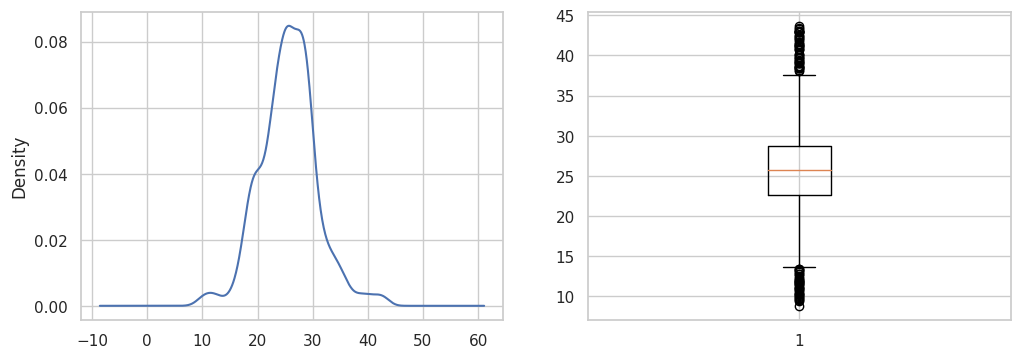

In [55]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

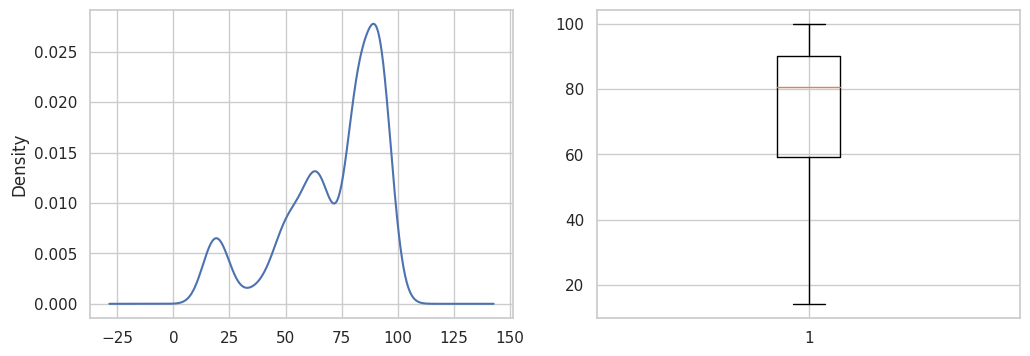

In [56]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

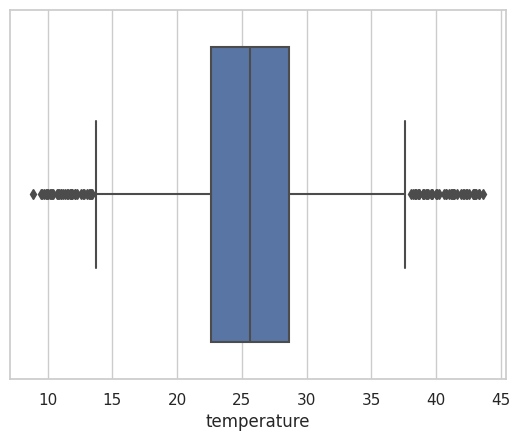

In [57]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

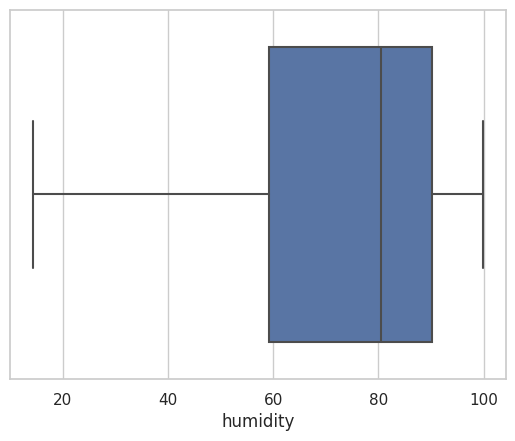

In [58]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [59]:
data_df = data_df.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis = 1)
data_df.head()

,temperature,humidity,label
0,20.879744,82.002744,padi
1,21.770462,80.319644,padi
2,23.004459,82.320763,padi
3,26.491096,80.158363,padi
4,20.130175,81.604873,padi


In [60]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 22.6024371125

Q3:
 28.68456602

IQR:
 6.0821289075

Min:
 13.47924375125

Max:
 37.807759381249994


In [61]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(2019, 3)

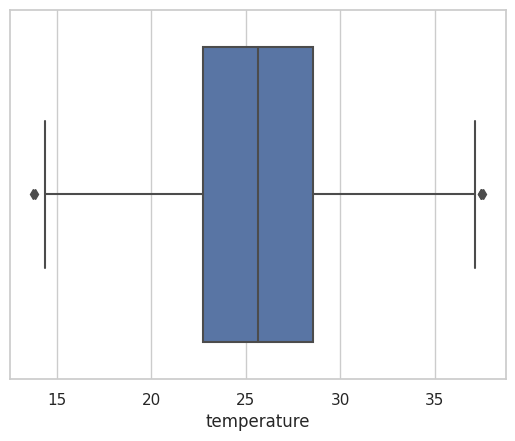

In [62]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [20]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
dtype: int64

In [21]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [66]:
df_clean.value_counts()

temperature  humidity   label         
13.703192    90.955894  jeruk             1
27.593501    91.797430  melon             1
27.672562    45.416920  mangga            1
27.667528    79.685428  pisang            1
27.654722    58.599863  kacang panjang    1
                                         ..
23.768816    90.598103  apel              1
23.761218    93.661643  apel              1
23.750331    92.881605  apel              1
23.738680    75.775038  kapas             1
37.588997    91.997404  pepaya            1
Length: 2019, dtype: int64

In [67]:
df_clean.tail()

,temperature,humidity,label
2095,26.774637,66.413269,kopi
2096,27.417112,56.636362,kopi
2097,24.131797,67.225123,kopi
2098,26.272418,52.127394,kopi
2099,23.603016,60.396475,kopi


In [68]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 2019
humidity , Unique : 2019
label , Unique : 21


# Visualisasi data

<ipython-input-69-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

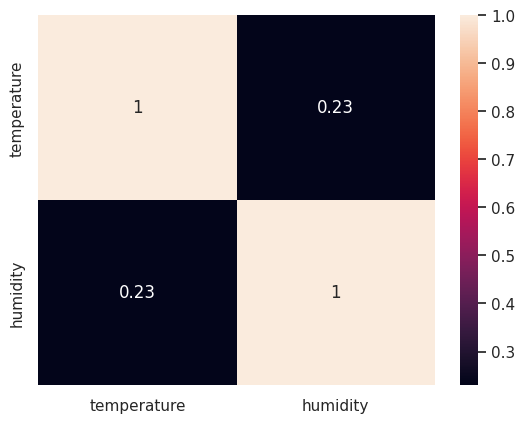

In [69]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [70]:
df_clean.corr()

<ipython-input-70-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity
temperature,1.000000,0.230747
humidity,0.230747,1.000000


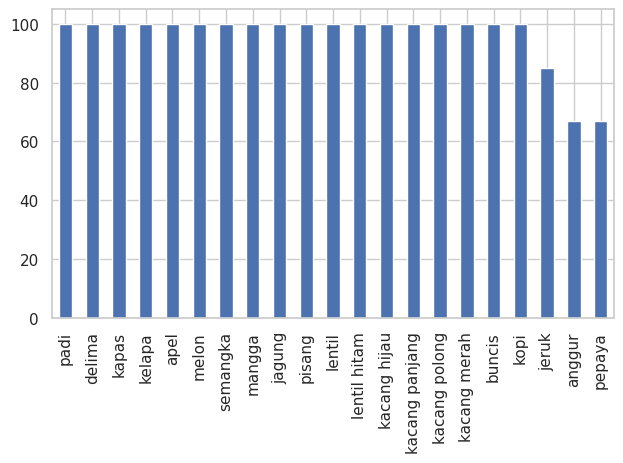

In [71]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

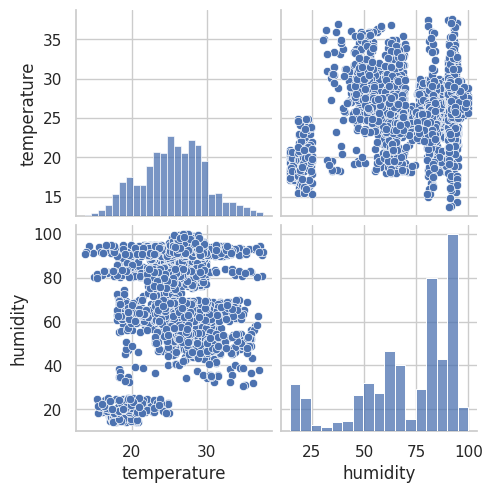

In [72]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [79]:
# X = data_df[data_df.columns[:-1]].values
# y = data_df[data_df.columns[-1]].values

# X.shape

(2019,)

# **Data Sintetik**

In [31]:
# pip install imbalanced-learn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# data_res = pd.DataFrame({
#     'temperature': X_res[:, 0],
#     'humidity': X_res[:, 1],
#     'label': y_res
# })

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
padi              100
delima            100
kapas             100
kelapa            100
apel              100
melon             100
semangka          100
mangga            100
jagung            100
pisang            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
jeruk              85
anggur             67
pepaya             67
Name: label, dtype: int64

Jumlah sampel setelah SMOTE:
padi              100
mangga            100
kapas             100
kelapa            100
pepaya            100
jeruk             100
apel              100
melon             100
semangka          100
anggur            100
pisang            100
jagung            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi         

# **Klasifikasi model**

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

In [110]:
# X = df_clean[['temperature', 'humidity']] #input features ke dalam x
# X.head()

In [43]:
# y = df_clean['label'] #label masuk ke variabel y
# y.head()

0    padi
1    padi
2    padi
3    padi
4    padi
Name: label, dtype: object

# **Split dataset ke training set dan testing set**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(1680, 2)
(1680,)

testing dataset:
(420, 2)
(420,)


# **Decission tree**

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# Decission tree

In [100]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [101]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.5547619047619048


**Classification report**

In [102]:
print(classification_report(y_test,predicted_values)) #classification report

                precision    recall  f1-score   support

        anggur       1.00      0.27      0.43        11
          apel       0.43      1.00      0.60         9
        buncis       0.67      1.00      0.80        18
        delima       0.72      0.65      0.68        20
        jagung       0.37      0.79      0.50        19
         jeruk       0.50      0.42      0.46        19
  kacang hijau       0.94      0.62      0.75        24
  kacang merah       1.00      0.62      0.77        24
kacang panjang       0.00      0.00      0.00        19
 kacang polong       0.40      0.46      0.43        13
         kapas       0.60      0.21      0.31        29
        kelapa       1.00      0.43      0.60        28
          kopi       0.60      0.52      0.56        23
        lentil       0.00      0.00      0.00        24
  lentil hitam       0.56      0.96      0.71        23
        mangga       0.56      0.82      0.67        17
         melon       0.39      1.00      0.56  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion matrix**

In [103]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0]
 [ 0  4  0  3  0  8  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  9  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  2  0  4  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  1  0  2  4  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  6  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  1  0  0 12  0  3  1  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0

In [104]:
from sklearn.model_selection import cross_val_score


In [105]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.6039604 , 0.60891089, 0.59158416, 0.60148515, 0.58312655])

# KNN

In [106]:
accuracies = []
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 2)) 

k =  1  => Akurasi =  0.57
k =  2  => Akurasi =  0.53
k =  3  => Akurasi =  0.55
k =  4  => Akurasi =  0.56
k =  5  => Akurasi =  0.57
k =  6  => Akurasi =  0.58
k =  7  => Akurasi =  0.59
k =  8  => Akurasi =  0.6
k =  9  => Akurasi =  0.6
k =  10  => Akurasi =  0.58
k =  11  => Akurasi =  0.59
k =  12  => Akurasi =  0.58
k =  13  => Akurasi =  0.59
k =  14  => Akurasi =  0.61
k =  15  => Akurasi =  0.6
k =  16  => Akurasi =  0.6
k =  17  => Akurasi =  0.58
k =  18  => Akurasi =  0.58
k =  19  => Akurasi =  0.58
k =  20  => Akurasi =  0.57
k =  21  => Akurasi =  0.58
k =  22  => Akurasi =  0.56
k =  23  => Akurasi =  0.57
k =  24  => Akurasi =  0.57


In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.5714285714285714
                precision    recall  f1-score   support

        anggur       0.48      1.00      0.65        11
          apel       0.42      0.89      0.57         9
        buncis       0.71      0.94      0.81        18
        delima       0.67      0.60      0.63        20
        jagung       0.48      0.58      0.52        19
         jeruk       0.62      0.42      0.50        19
  kacang hijau       0.65      0.92      0.76        24
  kacang merah       0.94      0.71      0.81        24
kacang panjang       0.38      0.47      0.42        19
 kacang polong       0.70      0.54      0.61        13
         kapas       0.62      0.34      0.44        29
        kelapa       0.71      0.54      0.61        28
          kopi       0.58      0.48      0.52        23
        lentil       0.50      0.38      0.43        24
  lentil hitam       0.71      0.65      0.68        23
        mangga       0.57      0.76      0.65        17
  

# Naive bayes

In [108]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.6166666666666667
                precision    recall  f1-score   support

        anggur       0.73      1.00      0.85        11
          apel       0.39      1.00      0.56         9
        buncis       0.90      1.00      0.95        18
        delima       0.64      0.45      0.53        20
        jagung       0.52      0.58      0.55        19
         jeruk       0.58      0.37      0.45        19
  kacang hijau       0.78      0.88      0.82        24
  kacang merah       1.00      0.92      0.96        24
kacang panjang       0.45      0.53      0.49        19
 kacang polong       0.70      0.54      0.61        13
         kapas       0.47      0.24      0.32        29
        kelapa       0.93      0.50      0.65        28
          kopi       0.53      0.35      0.42        23
        lentil       0.50      0.33      0.40        24
  lentil hitam       0.64      0.91      0.75        23
        mangga       0.72      0.76      0.74     

# Random forest

In [109]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.6261904761904762
                precision    recall  f1-score   support

        anggur       0.69      1.00      0.81        11
          apel       0.47      1.00      0.64         9
        buncis       0.89      0.94      0.92        18
        delima       0.68      0.65      0.67        20
        jagung       0.50      0.68      0.58        19
         jeruk       0.53      0.42      0.47        19
  kacang hijau       0.78      0.88      0.82        24
  kacang merah       0.96      0.92      0.94        24
kacang panjang       0.50      0.53      0.51        19
 kacang polong       0.67      0.46      0.55        13
         kapas       0.60      0.31      0.41        29
        kelapa       0.75      0.54      0.63        28
          kopi       0.54      0.57      0.55        23
        lentil       0.38      0.25      0.30        24
  lentil hitam       0.70      0.70      0.70        23
        mangga       0.57      0.71      0.63        17
  